# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [3]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('../data/absences.csv')
data

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

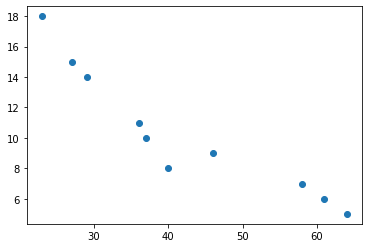

In [52]:
x = [x for x in data['Age']]
y = [y for y in data['Absences']]

plt.scatter(x=list(data['Age']), y=list(data['Absences']), data=data)
plt.show()

# The apparent relation is that as older the individual, as less absence occurrences produces

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [44]:
def slope_intercept(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    residual_x = [i - mean_x for i in x]
    residual_y = [j - mean_y for j in y]
    dif = [i*j for i, j in zip(residual_x, residual_y)]
    m = sum(dif) / sum([i**2 for i in residual_x])
    b = mean_y - m*mean_x
    return m, b

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [45]:
slope_intercept(x, y)

(-0.2681088337033404, 21.58738189891063)

In [46]:
predicted_y = [(21.58738189891063 + -0.2681088337033404 * i) for i in x]

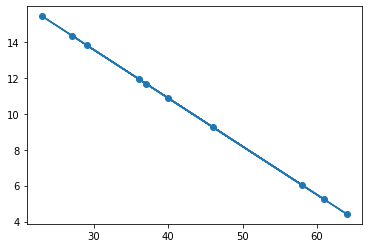

In [47]:
plt.plot(x, predicted_y)
plt.scatter(x=x, y=predicted_y)
plt.show()

# the regression line now follows a line overlapping all the points, so we can predict values

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [63]:
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    residual_x = [i - mean_x for i in x]
    residual_y = [j - mean_y for j in y]
    dif = [i*j for i, j in zip(residual_x, residual_y)]
    return (sum(dif)/(len(x)-1))

def correlation(x, y):
    return covariance(x, y)/(np.std(x)*np.std(y))

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [66]:
print(f'The covariance is {covariance(x, y)}')
print(f'The correlation is {correlation(x, y)}')

The covariance is -57.699999999999996
The correlation is -1.0361593436090013


In [67]:
# With those values we can tell that as the age increases, the absentism decreases. 
# In other words, younger worker are producing more absentism than older ones

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# There is a relation between age and absentism

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [70]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [76]:
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    residual_x = [i - mean_x for i in x]
    residual_y = [j - mean_y for j in y]
    dif = [i*j for i, j in zip(residual_x, residual_y)]
    return (sum(dif)/(len(x)-1))

def correlation(x, y):
    return covariance(x, y)/(np.std(x)*np.std(y))

In [81]:
print(covariance(ironbeers_df['X'], ironbeers_df['Y']))
print(correlation(ironbeers_df['X'], ironbeers_df['Y']))

12.0
1.1165810524781647


In [ ]:
# We can tell that as more people said to stay, as more people stays, with a high values of correlation

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

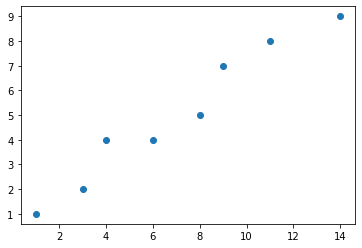

In [83]:
plt.scatter(x=ironbeers_df['X'], y=ironbeers_df['Y'])
plt.show()

In [ ]:
# There is a clear rising trend and the values almost draw a expected line so there is a high correlation

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [84]:
def slope_intercept(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    residual_x = [i - mean_x for i in x]
    residual_y = [j - mean_y for j in y]
    dif = [i*j for i, j in zip(residual_x, residual_y)]
    m = sum(dif) / sum([i**2 for i in residual_x])
    b = mean_y - m*mean_x
    return m, b

print(slope_intercept(x=ironbeers_df['X'], y=ironbeers_df['Y']))

(0.6363636363636364, 0.5454545454545459)


In [ ]:
# The slope is telling us that the line will be ascending and 
#that for every 10 people that we tell about ironbeers, 6.3 will come

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here